In [ ]:
!pip install ultralytics
import cv2
from ultralytics import YOLO

def count_objects(image_path):
    model = YOLO('yolov8n.pt')  # Load the YOLO model
    image = cv2.imread(image_path)
    results = model(image)  # Perform detection

    item_count = 0
    for result in results:
        boxes = result.boxes
        item_count += len(boxes)  # Count detected items
        for box in boxes:
            x1, y1, x2, y2 = box.xyxy[0]
            label = box.cls[0]
            confidence = box.conf[0]
            cv2.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), (255, 0, 0), 2)
            cv2.putText(image, f'{label} {confidence:.2f}', (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    cv2.imshow('Detected Items', image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    print(f'Total items detected: {item_count}')

count_objects('path/to/image.jpg')

def main():
    image_path = '/content/gro1.jpg'  # Replace with your image path
    count_objects(image_path)

if __name__ == "__main__":
    main()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.8/898.8 kB 39.0 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 264MB/s]

WARNING ⚠️ 'source' is missing. Using 'source=/usr/local/lib/python3.10/dist-packages/ultralytics/assets'.



image 1/2 /usr/local/lib/python3.10/dist-packages/ultralytics/assets/bus.jpg: 640x480 4 persons, 1 bus, 1 stop sign, 355.2ms
image 2/2 /usr/local/lib/python3.10/dist-packages/ultralytics/assets/zidane.jpg: 384x640 2 persons, 1 tie, 155.6ms
Speed: 10.2ms preprocess, 255.4ms inference, 16.6ms postprocess per image at shape (1, 3, 384, 640)


DisabledFunctionError: cv2.imshow() is disabled in Colab, because it causes Jupyter sessions
to crash; see https://github.com/jupyter/notebook/issues/3935.
As a substitution, consider using
  from google.colab.patches import cv2_imshow


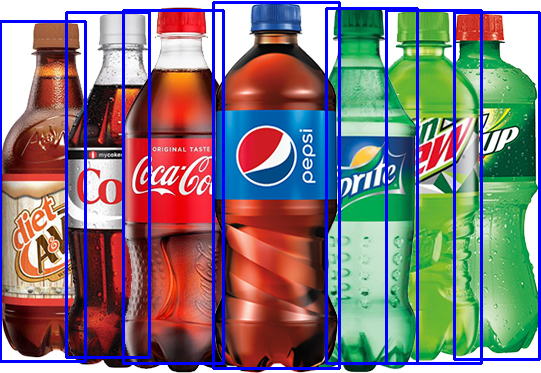

0: 448x640 7 bottles, 202.7ms
Speed: 6.6ms preprocess, 202.7ms inference, 1.9ms postprocess per image at shape (1, 3, 448, 640)
Total items detected: 7


In [3]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from ultralytics import YOLO

class ObjectCounter:
    def __init__(self, model_path):
        # Load the YOLO model (Ensure 'yolov8n.pt' is downloaded in the working directory or provide the full path)
        self.model = YOLO(model_path)

    def count_objects(self, image_path):
        # Read the input image
        image = cv2.imread(image_path)
        if image is None:
            print(f"Error: Could not read image from {image_path}")
            return

        # Get predictions from the YOLO model
        results = self.model(image)

        # Initialize a count for detected items
        item_count = 0

        # Iterate over detected objects
        for result in results:
            boxes = result.boxes
            for box in boxes:
                # Extract coordinates and other details
                x1, y1, x2, y2 = box.xyxy[0]
                label = self.model.names[int(box.cls[0])]  # Get the class name
                confidence = box.conf[0]

                # Draw bounding box and label on the image
                cv2.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), (255, 0, 0), 2)
                cv2.putText(image, f'{label} {confidence:.2f}', (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)

                item_count += 1

        # Display the processed image with bounding boxes
        cv2_imshow(image)

        # Print the total number of detected items
        print(f'Total items detected: {item_count}')

# Initialize the ObjectCounter with the model path
object_counter = ObjectCounter('yolov8n.pt')

# Call the method to count objects in an image
object_counter.count_objects("")




0: 512x640 21 bottles, 1 refrigerator, 203.5ms
Speed: 3.9ms preprocess, 203.5ms inference, 1.7ms postprocess per image at shape (1, 3, 512, 640)


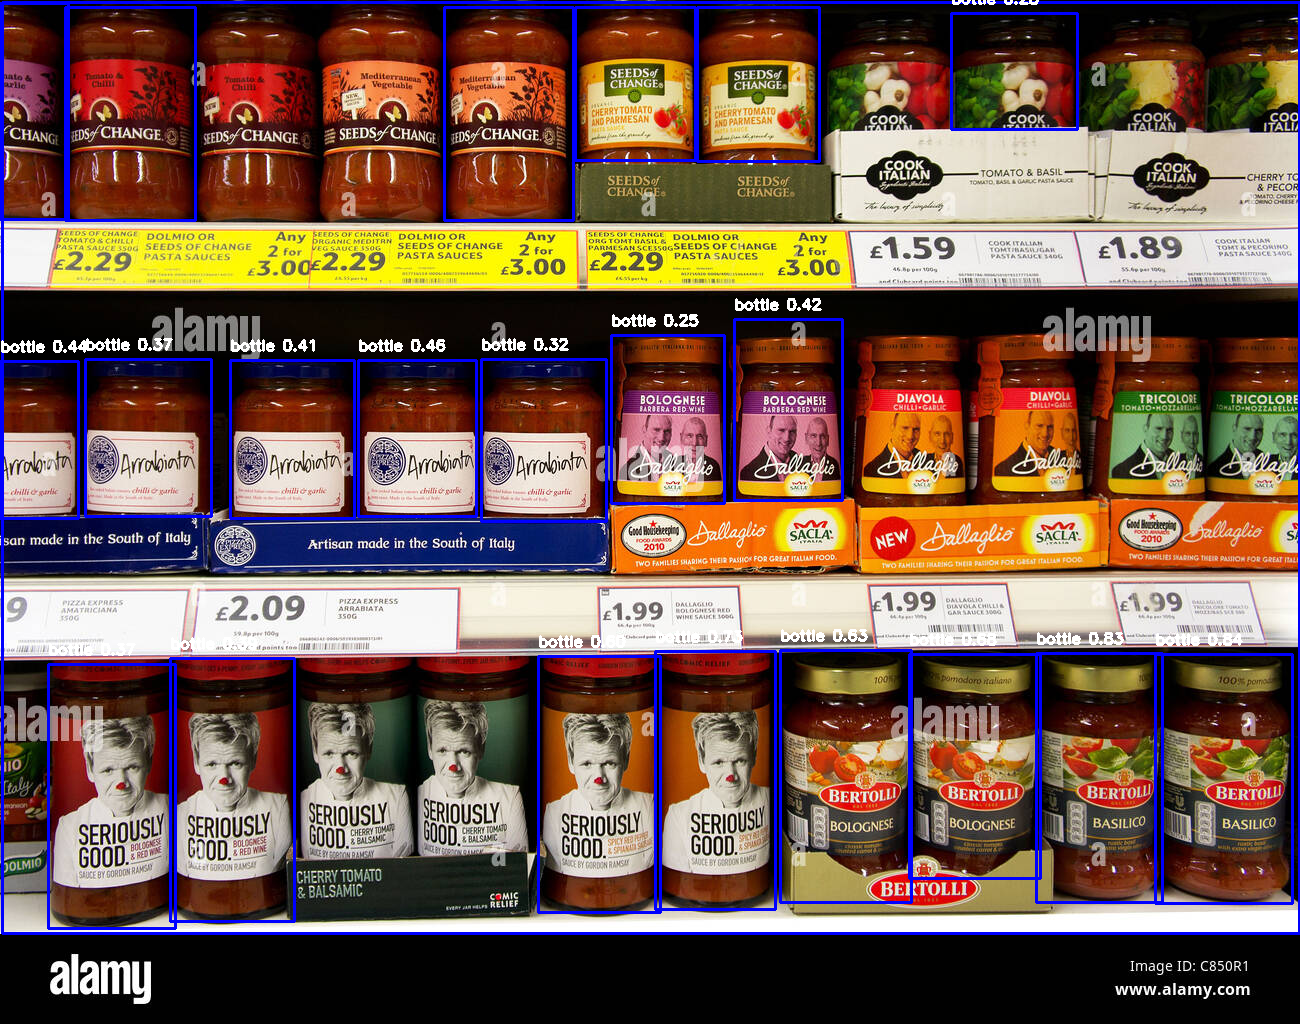

Total items detected: 22


In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from ultralytics import YOLO

def count_objects(image_path):
    # Load the YOLO model (Ensure 'yolov8n.pt' is downloaded in the working directory or provide the full path)
    model = YOLO('yolov8n.pt')

    # Read the input image
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Could not read image from {image_path}")
        return

    # Get predictions from the YOLO model
    results = model(image)

    # Initialize a count for detected items
    item_count = 0

    # Iterate over detected objects
    for result in results:
        boxes = result.boxes
        for box in boxes:
            # Extract coordinates and other details
            x1, y1, x2, y2 = box.xyxy[0]
            label = model.names[int(box.cls[0])]  # Get the class name
            confidence = box.conf[0]

            # Draw bounding box and label on the image
            cv2.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), (255, 0, 0), 2)
            cv2.putText(image, f'{label} {confidence:.2f}', (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)

            item_count += 1

    # Display the processed image with bounding boxes
    cv2_imshow(image)

    # Print the total number of detected items
    print(f'Total items detected: {item_count}')

# Call the function with the path to your uploaded image
count_objects("/content/SHELF.jpg")


In [ ]:
!pip install super-gradients
from super_gradients.training import models
from super_gradients.common.object_names import Models

import cv2
import numpy as np

def count_groceries(image_path):
    # Load the YOLO-NAS model
    model = models.get(Models.YOLO_NAS_L, pretrained_weights="coco")

    # Read the image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Perform inference
    result = list(model.predict(image, conf=0.25))[0]

    # Get the detections
    bboxes = result.prediction.bboxes_xyxy
    labels = result.prediction.labels
    confidences = result.prediction.confidence

    # Count unique grocery items
    unique_items = set(labels)
    total_items = len(labels)

    return total_items, len(unique_items)

# Example usage
image_path = "/content/CHIPS.jpg"
total_items, unique_items = count_groceries(image_path)
print(f"Total grocery items detected: {total_items}")
print(f"Unique grocery items detected: {unique_items}")

The console stream is logged into /root/sg_logs/console.log


[2024-12-10 15:50:48] INFO - crash_tips_setup.py - Crash tips is enabled. You can set your environment variable to CRASH_HANDLER=FALSE to disable it
[2024-12-10 15:50:54] INFO - utils.py - NumExpr defaulting to 2 threads.
[2024-12-10 15:51:02] WARNING - checkpoint_utils.py - :warning: The pre-trained models provided by SuperGradients may have their own licenses or terms and conditions derived from the dataset used for pre-training.
 It is your responsibility to determine whether you have permission to use the models for your use case.
 The model you have requested was pre-trained on the coco dataset, published under the following terms: https://cocodataset.org/#termsofuse
[2024-12-10 15:51:02] INFO - checkpoint_utils.py - License Notification: YOLO-NAS pre-trained weights are subjected to the specific license terms and conditions detailed in 
https://github.com/Deci-AI/super-gradients/blob/master/LICENSE.YOLONAS.md
By downloading the pre-trained weight files you agree to comply with th

URLError: <urlopen error [Errno -2] Name or service not known>

In [2]:
import cv2
import numpy as np

def count_groceries(image_path):
    # Load the YOLO-NAS model
    model = models.get(Models.YOLO_NAS_L, pretrained_weights="coco")

    # Read the image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Perform inference
    result = list(model.predict(image, conf=0.25))[0]

    # Get the detections
    bboxes = result.prediction.bboxes_xyxy
    labels = result.prediction.labels
    confidences = result.prediction.confidence

    # Count unique grocery items
    unique_items = set(labels)
    total_items = len(labels)

    return total_items, len(unique_items)

# Example usage
image_path = "/content/CHIPS.jpg"
total_items, unique_items = count_groceries(image_path)
print(f"Total grocery items detected: {total_items}")
print(f"Unique grocery items detected: {unique_items}")

[2024-12-10 15:54:30] WARNING - checkpoint_utils.py - :warning: The pre-trained models provided by SuperGradients may have their own licenses or terms and conditions derived from the dataset used for pre-training.
 It is your responsibility to determine whether you have permission to use the models for your use case.
 The model you have requested was pre-trained on the coco dataset, published under the following terms: https://cocodataset.org/#termsofuse
[2024-12-10 15:54:30] INFO - checkpoint_utils.py - License Notification: YOLO-NAS pre-trained weights are subjected to the specific license terms and conditions detailed in 
https://github.com/Deci-AI/super-gradients/blob/master/LICENSE.YOLONAS.md
By downloading the pre-trained weight files you agree to comply with these terms.
Downloading: "https://sghub.deci.ai/models/yolo_nas_l_coco.pth" to /root/.cache/torch/hub/checkpoints/yolo_nas_l_coco.pth


URLError: <urlopen error [Errno -2] Name or service not known>

In [ ]:
model = YOLO('yolov8n.pt')
print(model.names)  # Prints the class names for the pre-trained model


{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell phone', 68: 'microw


0: 480x640 6 bottles, 1 clock, 191.4ms
Speed: 4.3ms preprocess, 191.4ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


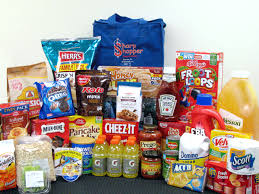

Total items detected: 0


In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from ultralytics import YOLO

# Define the classes of interest (indices correspond to those in model.names)
INTERESTED_CLASSES = ['banana', 'apple', 'orange', 'carrot', 'broccoli', 'pizza', 'sandwich', 'donut', 'cake', 'potted plant', 'bed', 'dining table', 'refrigerator', 'tv', 'toothbrush']  # Add or remove as necessary

def count_objects(image_path):
    # Load the YOLO model (Ensure 'yolov8n.pt' is downloaded in the working directory or provide the full path)
    model = YOLO('yolov8n.pt')

    # Read the input image
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Could not read image from {image_path}")
        return

    # Get predictions from the YOLO model
    results = model(image)

    # Initialize a count for detected items
    item_count = 0
    confidence_threshold = 0.5  # Adjust as needed
    min_area = 100  # Minimum area for bounding boxes
    max_area = 10000  # Maximum area for bounding boxes

    # Iterate over detected objects
    for result in results:
        boxes = result.boxes
        for box in boxes:
            x1, y1, x2, y2 = box.xyxy[0]
            confidence = box.conf[0]

            # Filter by confidence threshold
            if confidence < confidence_threshold:
                continue

            # Calculate area of the bounding box
            width = x2 - x1
            height = y2 - y1
            area = width * height

            # Filter by area constraints
            if min_area <= area <= max_area:
                # Extract class label
                class_id = int(box.cls[0])
                label = model.names[class_id]

                # Check if the detected class is one of the interested classes
                if label in INTERESTED_CLASSES:
                    # Draw bounding box and label on the image
                    cv2.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), (255, 0, 0), 2)
                    cv2.putText(image, f'{label} {confidence:.2f}', (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)

                    item_count += 1

    # Display the processed image with bounding boxes
    cv2_imshow(image)

    # Print the total number of detected items
    print(f'Total items detected: {item_count}')

# Call the function with the path to your uploaded image
count_objects("/content/gro2.jpg")



/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:01<00:00, 104MB/s] 


Comparing YOLOv8:

0: 480x640 6 bottles, 1 clock, 299.6ms
Speed: 5.0ms preprocess, 299.6ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)


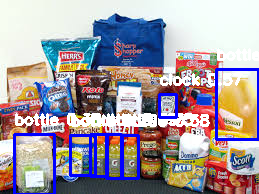

Total items detected: 7
Comparing Faster R-CNN:


IndexError: list index out of range

In [ ]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from ultralytics import YOLO
import torch
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.transforms import functional as F

# Function to run detection and display results
def run_detection(model, image_path, class_names):
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Could not read image from {image_path}")
        return None

    if isinstance(model, YOLO):
        results = model(image)
        boxes = results[0].boxes

        for box in boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            label = model.names[int(box.cls[0])]
            confidence = box.conf[0]

            # Draw bounding box and label on the image
            cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 2)
            cv2.putText(image, f'{label} {confidence:.2f}', (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)

        cv2_imshow(image)
        print(f'Total items detected: {len(boxes)}')

    elif isinstance(model, torch.nn.Module):  # For Faster R-CNN
        # Load image, convert it to tensor
        img = F.to_tensor(image).unsqueeze(0)  # Adding batch dimension
        with torch.no_grad():
            outputs = model(img)

        boxes = outputs[0]['boxes'].detach().numpy()
        labels = outputs[0]['labels'].detach().numpy()
        scores = outputs[0]['scores'].detach().numpy()

        for i, (box, label, score) in enumerate(zip(boxes, labels, scores)):
            x1, y1, x2, y2 = map(int, box)
            cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 2)
            cv2.putText(image, f'{class_names[label]} {score:.2f}', (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)

        cv2_imshow(image)
        print(f'Total items detected: {len(boxes)}')

# Load classes for the models
class_names = [
    'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light',
    'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee',
    'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard',
    'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
    'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant',
    'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave',
    'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

# YOLOv8
yolo_v8_model = YOLO('yolov8n.pt')  # Adjust path if necessary

# YOLOv7 (if available)
# yolo_v7_model = YOLO('yolov7.pt')  # Adjust path if necessary

# Faster R-CNN
faster_rcnn_model = fasterrcnn_resnet50_fpn(pretrained=True)
faster_rcnn_model.eval()

# Compare models on the same image
image_path = "/content/gro2.jpg"

print("Comparing YOLOv8:")
run_detection(yolo_v8_model, image_path, class_names)

# Uncomment if you have YOLOv7 model
# print("Comparing YOLOv7:")
# run_detection(yolo_v7_model, image_path, class_names)

print("Comparing Faster R-CNN:")
run_detection(faster_rcnn_model, image_path, class_names)


Comparing YOLOv8:

0: 480x640 6 bottles, 1 clock, 176.6ms
Speed: 2.9ms preprocess, 176.6ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


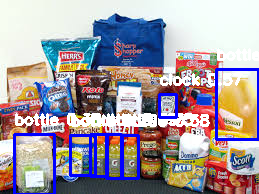

Total items detected: 7
Comparing Faster R-CNN:
Invalid class index: 84
Invalid class index: 84
Invalid class index: 82
Invalid class index: 84
Invalid class index: 84
Invalid class index: 84
Invalid class index: 84


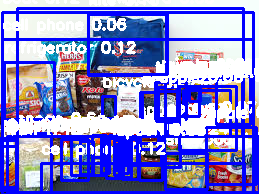

Total items detected: 56


In [ ]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from ultralytics import YOLO
import torch
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.transforms import functional as F

# Function to run detection and display results
def run_detection(model, image_path, class_names):
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Could not read image from {image_path}")
        return None

    if isinstance(model, YOLO):
        results = model(image)
        boxes = results[0].boxes

        for box in boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            label = model.names[int(box.cls[0])]
            confidence = box.conf[0]

            # Draw bounding box and label on the image
            cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 2)
            cv2.putText(image, f'{label} {confidence:.2f}', (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)

        cv2_imshow(image)
        print(f'Total items detected: {len(boxes)}')

    elif isinstance(model, torch.nn.Module):  # For Faster R-CNN
        # Load image, convert it to tensor
        img = F.to_tensor(image).unsqueeze(0)  # Adding batch dimension
        with torch.no_grad():
            outputs = model(img)

        boxes = outputs[0]['boxes'].detach().numpy()
        labels = outputs[0]['labels'].detach().numpy()
        scores = outputs[0]['scores'].detach().numpy()

        for i, (box, label, score) in enumerate(zip(boxes, labels, scores)):
            x1, y1, x2, y2 = map(int, box)
            if label < len(class_names):  # Check if the class index is within range
                cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 2)
                cv2.putText(image, f'{class_names[label]} {score:.2f}', (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)
            else:
                print(f"Invalid class index: {label}")

        cv2_imshow(image)
        print(f'Total items detected: {len(boxes)}')

# Load classes for the models
class_names = [
    'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light',
    'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee',
    'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard',
    'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
    'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant',
    'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave',
    'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

# YOLOv8
yolo_v8_model = YOLO('yolov8n.pt')  # Adjust path if necessary

# YOLOv7 (if available)
# yolo_v7_model = YOLO('yolov7.pt')  # Adjust path if necessary

# Faster R-CNN
faster_rcnn_model = fasterrcnn_resnet50_fpn(pretrained=True)
faster_rcnn_model.eval()

# Compare models on the same image
image_path = "/content/gro2.jpg"

print("Comparing YOLOv8:")
run_detection(yolo_v8_model, image_path, class_names)

# Uncomment if you have YOLOv7 model
# print("Comparing YOLOv7:")
# run_detection(yolo_v7_model, image_path, class_names)

print("Comparing Faster R-CNN:")
run_detection(faster_rcnn_model, image_path, class_names)


YOLOv4 Tiny model file not found. Please upload the model file to Colab.
Comparing YOLOv8:

0: 480x640 6 bottles, 1 clock, 180.5ms
Speed: 3.6ms preprocess, 180.5ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


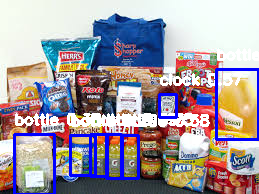

Total items detected: 7
Comparing Tiny YOLOv4:


NameError: name 'tiny_yolov4_model' is not defined

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from ultralytics import YOLO
import torch
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.transforms import functional as F
from google.colab import files

# Function to run detection and display results
def run_detection(model, image_path, class_names):
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Could not read image from {image_path}")
        return None

    if isinstance(model, YOLO):
        results = model(image)
        boxes = results[0].boxes

        for box in boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            label = model.names[int(box.cls[0])]
            confidence = box.conf[0]

            # Draw bounding box and label on the image
            cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 2)
            cv2.putText(image, f'{label} {confidence:.2f}', (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)

        cv2_imshow(image)
        print(f'Total items detected: {len(boxes)}')

    elif isinstance(model, torch.nn.Module):  # For Faster R-CNN
        # Load image, convert it to tensor
        img = F.to_tensor(image).unsqueeze(0)  # Adding batch dimension
        with torch.no_grad():
            outputs = model(img)

        boxes = outputs[0]['boxes'].detach().numpy()
        labels = outputs[0]['labels'].detach().numpy()
        scores = outputs[0]['scores'].detach().numpy()

        for i, (box, label, score) in enumerate(zip(boxes, labels, scores)):
            x1, y1, x2, y2 = map(int, box)
            if label < len(class_names):  # Check if the class index is within range
                cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 2)
                cv2.putText(image, f'{class_names[label]} {score:.2f}', (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)
            else:
                print(f"Invalid class index: {label}")

        cv2_imshow(image)
        print(f'Total items detected: {len(boxes)}')

# Load classes for the models
class_names = [
    'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light',
    'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee',
    'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard',
    'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
    'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant',
    'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave',
    'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

# Load YOLO models
yolo_model = YOLO('/content/yolov8n.pt')  # Update path to your YOLO model file

# Load Tiny YOLOv4 model
try:
    tiny_yolov4_model = YOLO('/content/yolov4-tiny.pt')  # Update path if necessary
except FileNotFoundError:
    print("YOLOv4 Tiny model file not found. Please upload the model file to Colab.")

# Load Faster R-CNN model
try:
    faster_rcnn_model = fasterrcnn_resnet50_fpn(pretrained=True)
    faster_rcnn_model.eval()
except RuntimeError as e:
    print(f"Error loading Faster R-CNN model: {e}")

# Compare models on the same image
image_path = "/content/gro2.jpg"

print("Comparing YOLOv8:")
run_detection(yolo_model, image_path, class_names)

print("Comparing Tiny YOLOv4:")
run_detection(tiny_yolov4_model, image_path, class_names)

print("Comparing Faster R-CNN:")
run_detection(faster_rcnn_model, image_path, class_names)




Invalid class index: 86
Invalid class index: 86
Invalid class index: 86
Invalid class index: 86


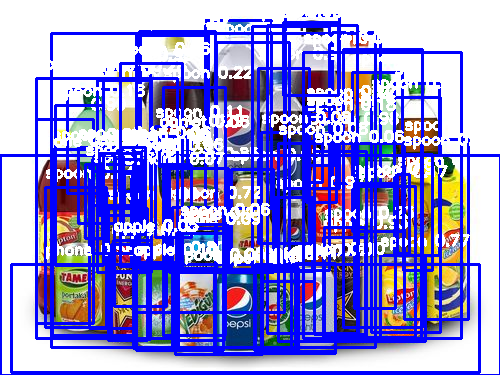

Total items detected: 84


In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.transforms import functional as F
import torch

# Load the pre-trained Faster R-CNN model with a ResNet50 backbone
faster_rcnn_model = fasterrcnn_resnet50_fpn(pretrained=True)
faster_rcnn_model = faster_rcnn_model.eval()  # Switch model to evaluation mode

# Load classes for the models
class_names = [
    'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light',
    'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee',
    'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard',
    'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
    'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch',
    'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear',
    'hair drier', 'toothbrush'
]

# Function to run detection and display results
def run_detection(model, image_path, class_names):
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Could not read image from {image_path}")
        return None

    # Load image, convert it to tensor
    img = F.to_tensor(image).unsqueeze(0)  # Adding batch dimension
    with torch.no_grad():
        outputs = model(img)

    boxes = outputs[0]['boxes'].detach().numpy()
    labels = outputs[0]['labels'].detach().numpy()
    scores = outputs[0]['scores'].detach().numpy()

    for i, (box, label, score) in enumerate(zip(boxes, labels, scores)):
        x1, y1, x2, y2 = map(int, box)
        if label < len(class_names):  # Check if the class index is within range
            cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 2)
            cv2.putText(image, f'{class_names[label]} {score:.2f}', (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)
        else:
            print(f"Invalid class index: {label}")

    cv2_imshow(image)
    print(f'Total items detected: {len(boxes)}')

# Call the function with the path to your uploaded image
run_detection(faster_rcnn_model, "/content/GRO3.jpeg", class_names)
